## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [3]:
data = pd.read_csv(PATH+'Windowed_IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,Prediction
1986-03,-1.232322,-1.079314,-0.669004,-1.232322,-1.084088,-0.669004,-1.232322,-1.081432,-0.669004,-1.232322,-1.007231,-0.669004,15.921562
1986-06,-1.232322,-1.084088,-0.669004,-1.232322,-1.081432,-0.669004,-1.232322,-1.007231,-0.669004,-1.232322,-1.013861,-0.669004,14.741072
1986-09,-1.232322,-1.081432,-0.669004,-1.232322,-1.007231,-0.669004,-1.232322,-1.013861,-0.669004,-1.232322,-1.022850,-0.669004,13.267827
1986-12,-1.232322,-1.007231,-0.669004,-1.232322,-1.013861,-0.669004,-1.232322,-1.022850,-0.669004,-1.232322,-1.047896,-0.669004,16.734827
1987-03,-1.232322,-1.013861,-0.669004,-1.232322,-1.022850,-0.669004,-1.232322,-1.047896,-0.669004,-1.232322,-1.079154,-0.669004,18.234604
1987-06,-1.232322,-1.022850,-0.669004,-1.232322,-1.047896,-0.669004,-1.232322,-1.079154,-0.669004,-1.232322,-1.005595,-0.669004,17.033018
1987-09,-1.232322,-1.047896,-0.669004,-1.232322,-1.079154,-0.669004,-1.232322,-1.005595,-0.669004,-1.232322,-0.973774,-0.669004,13.170275
1987-12,-1.232322,-1.079154,-0.669004,-1.232322,-1.005595,-0.669004,-1.232322,-0.973774,-0.669004,-1.232322,-0.999268,-0.669004,12.397405
1988-03,-1.232322,-1.005595,-0.669004,-1.232322,-0.973774,-0.669004,-1.232322,-0.999268,-0.669004,-1.232322,-1.081224,-0.669004,14.816329
1988-06,-1.232322,-0.973774,-0.669004,-1.232322,-0.999268,-0.669004,-1.232322,-1.081224,-0.669004,-1.232322,-1.097622,-0.669004,13.538924


## 2.1 No scaled y dataset evaluation

In [7]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
rf = GridSearchCV(RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021), n_jobs=-1, cv=cv,
                  param_grid = {
                        'n_estimators': [10, 20, 30, 40, 50, 100],
                        'max_depth': [3, None],
                        'max_features': ['auto', 'sqrt', 'log2'],
                        'oob_score': [True, False],
                        'min_samples_leaf': [1,2,3,4],
                      },
                  scoring='neg_root_mean_squared_error'
)
data = pd.read_csv(PATH+'Windowed_IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,rf,scaling=False))

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100, 'oob_score': True}


In [ ]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 20, 'oob_score': True}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021, max_depth=Params['max_depth'], min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('Windowed_{}_Manual_dataset.csv', PATH, rf, cv=cv, scaling=False)

## 2.2 scaled y dataset evaluation

In [8]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
rf = GridSearchCV(RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021), n_jobs=-1, cv=cv,
                  param_grid = {
                        'n_estimators': [10, 20, 30, 40, 50, 100],
                        'max_depth': [3, None],
                        'max_features': ['auto', 'sqrt', 'log2'],
                        'oob_score': [True, False],
                        'min_samples_leaf': [1,2,3,4],
                      },
                  scoring='neg_root_mean_squared_error'
)
data = pd.read_csv(PATH+'Windowed_IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,rf,scaling=True))

{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 20, 'oob_score': True}


In [ ]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 20, 'oob_score': True}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=2021, max_depth=Params['max_depth'], min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('Windowed_{}_Manual_dataset.csv', PATH, rf, cv=cv, scaling=True)

## 3.0 Model testing settings

In [5]:
from lib.fundamental_lib import make_dict
datas = make_dict('Windowed_{}_Manual_dataset.csv', PATH)

## 3.1 Random split - No scaled prediction variable

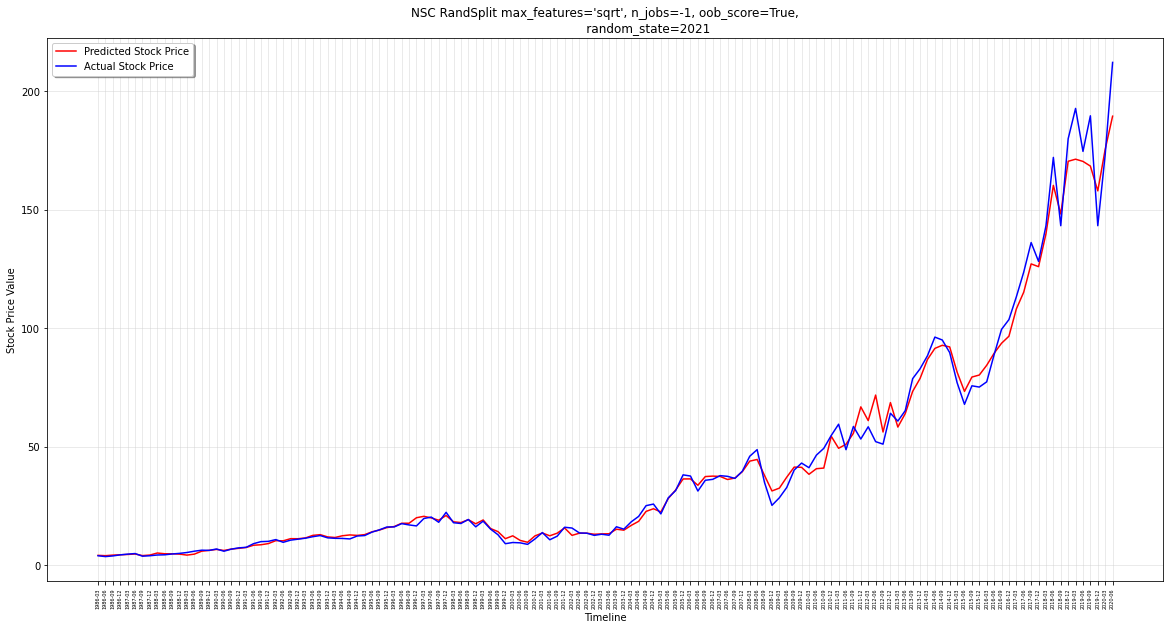

NSC MODEL RESULTS
 RMSE
 	Test: 8.21711800816269
 MAPE
 	Test: 0.12705633195434796
 MAE
 	Test: 5.048579551833016
 R2 Score Adj
 	Test: 0.9611260998497202



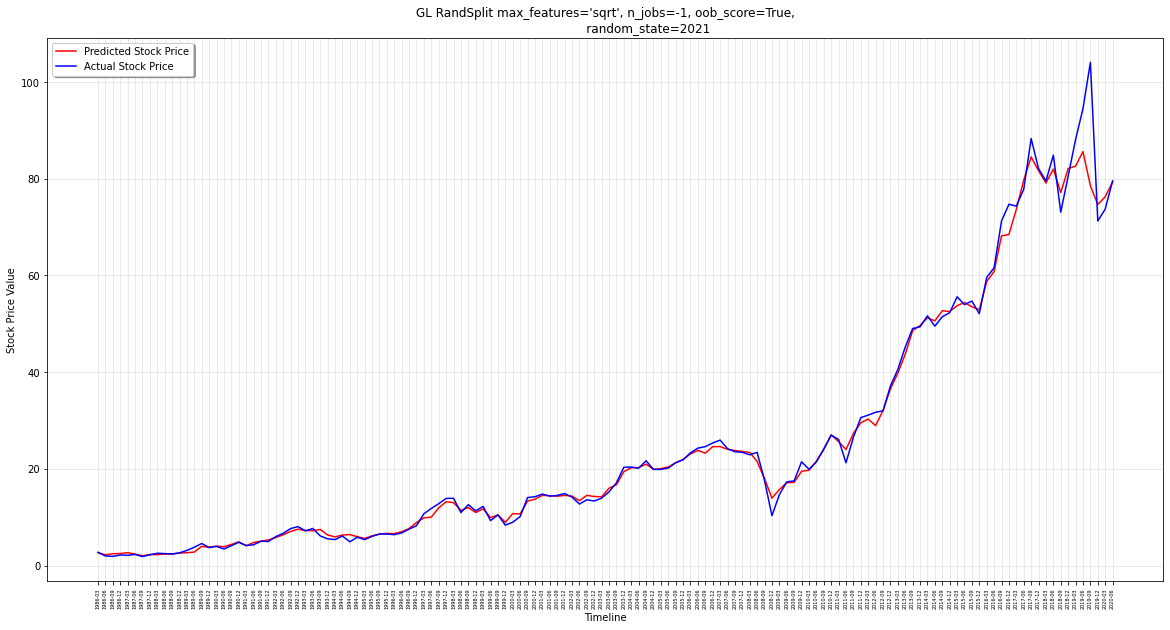

GL MODEL RESULTS
 RMSE
 	Test: 5.16062982471148
 MAPE
 	Test: 0.09994377486636763
 MAE
 	Test: 2.0131779370989116
 R2 Score Adj
 	Test: 0.942806125070202



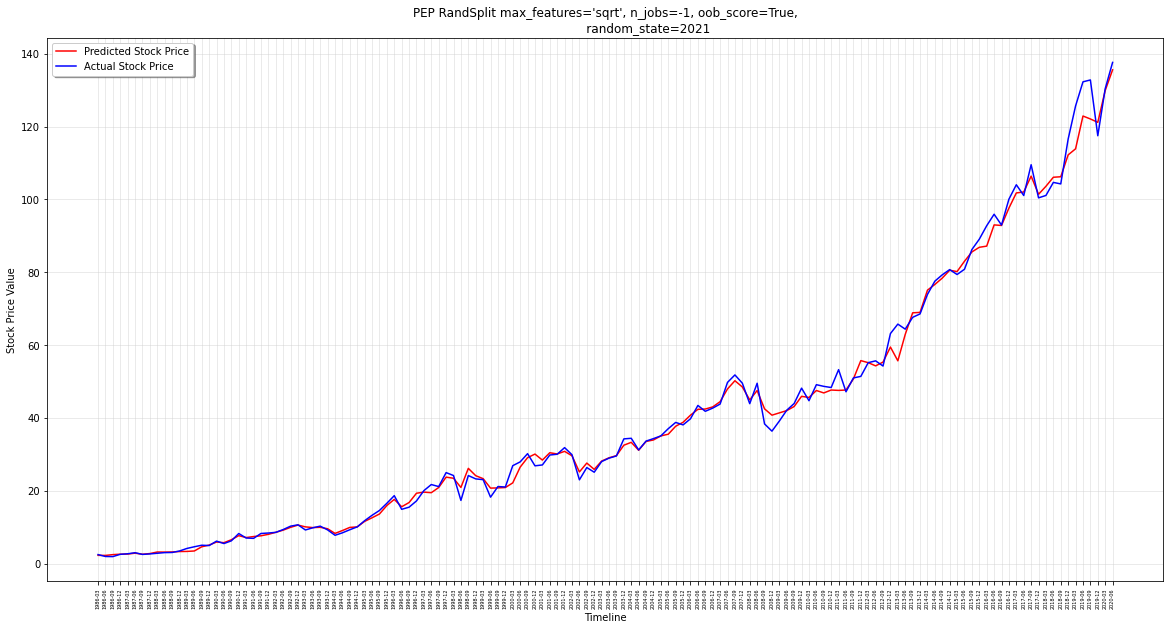

PEP MODEL RESULTS
 RMSE
 	Test: 4.288614157910872
 MAPE
 	Test: 0.09017322645928234
 MAE
 	Test: 2.775040695411819
 R2 Score Adj
 	Test: 0.9792436170836061



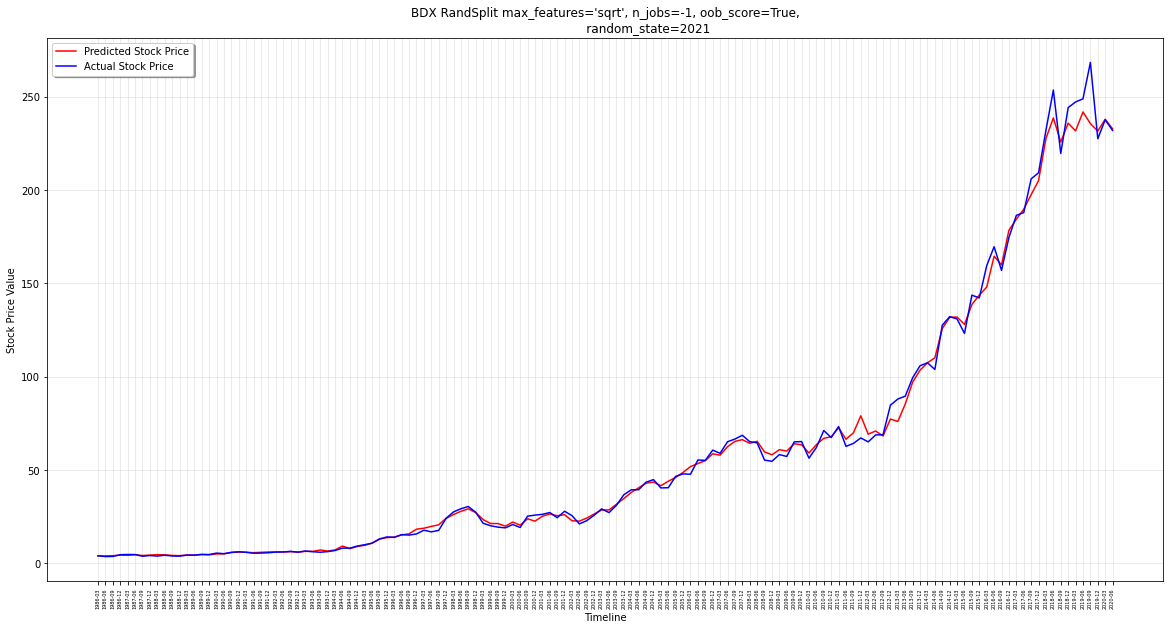

BDX MODEL RESULTS
 RMSE
 	Test: 8.21744451102263
 MAPE
 	Test: 0.08183896493150945
 MAE
 	Test: 4.422722822938644
 R2 Score Adj
 	Test: 0.981130873327956



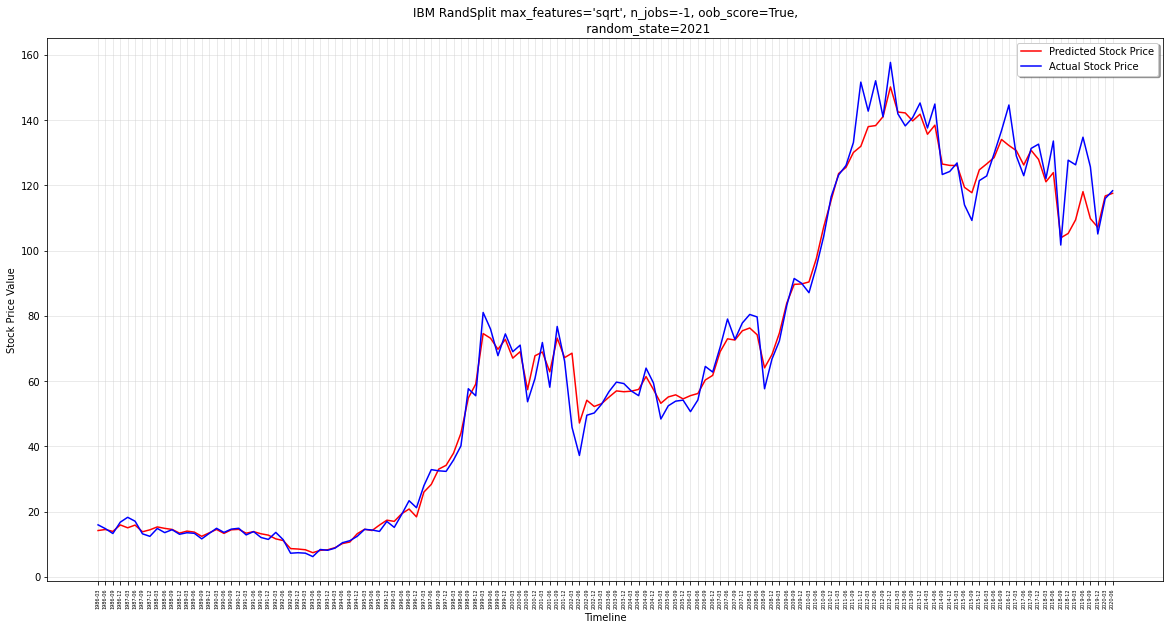

IBM MODEL RESULTS
 RMSE
 	Test: 9.331257954037493
 MAPE
 	Test: 0.10034511846211794
 MAE
 	Test: 5.91355955651828
 R2 Score Adj
 	Test: 0.9473165506250805



In [9]:
from lib.fundamental_lib import model_results_revised
#Best Params
#Params={'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 30, 'oob_score': True}
Params={'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100, 'oob_score': True}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_depth=Params['max_depth'], random_state=2021, min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    model_results_revised(datas[stock], rf, label=stock, scaling=False, start='1986-03')

## 3.2 Random split - Scaled prediction variable

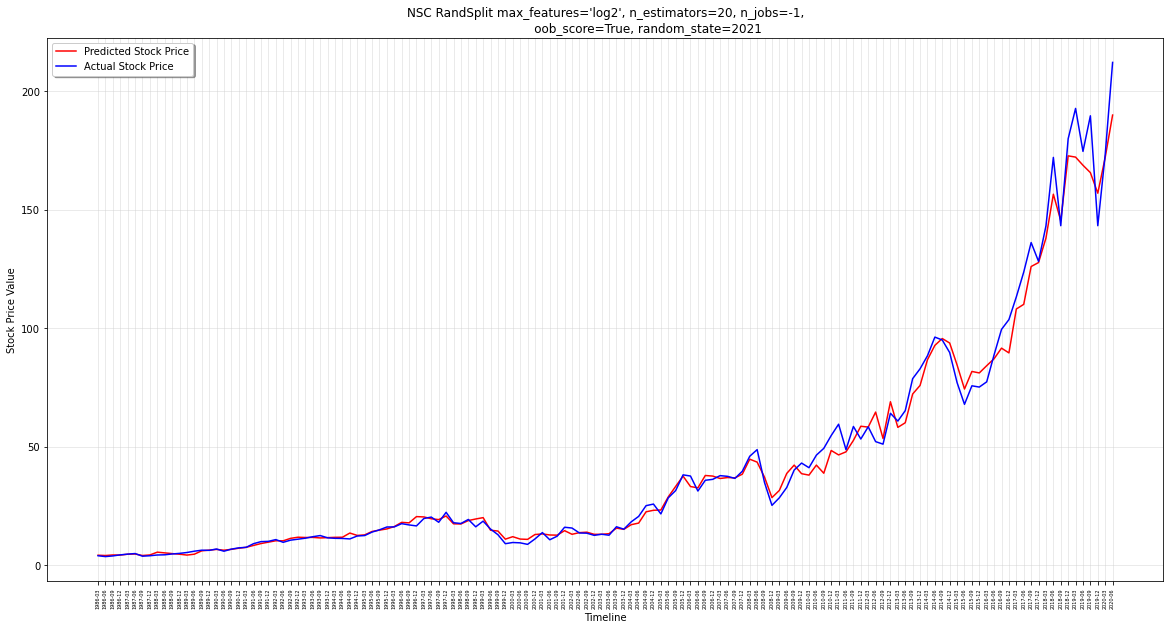

NSC MODEL RESULTS
 RMSE
 	Test: 8.083569762641794
 MAPE
 	Test: 0.13089958047236405
 MAE
 	Test: 5.082483217120169
 R2 Score Adj
 	Test: 0.9623794233487881



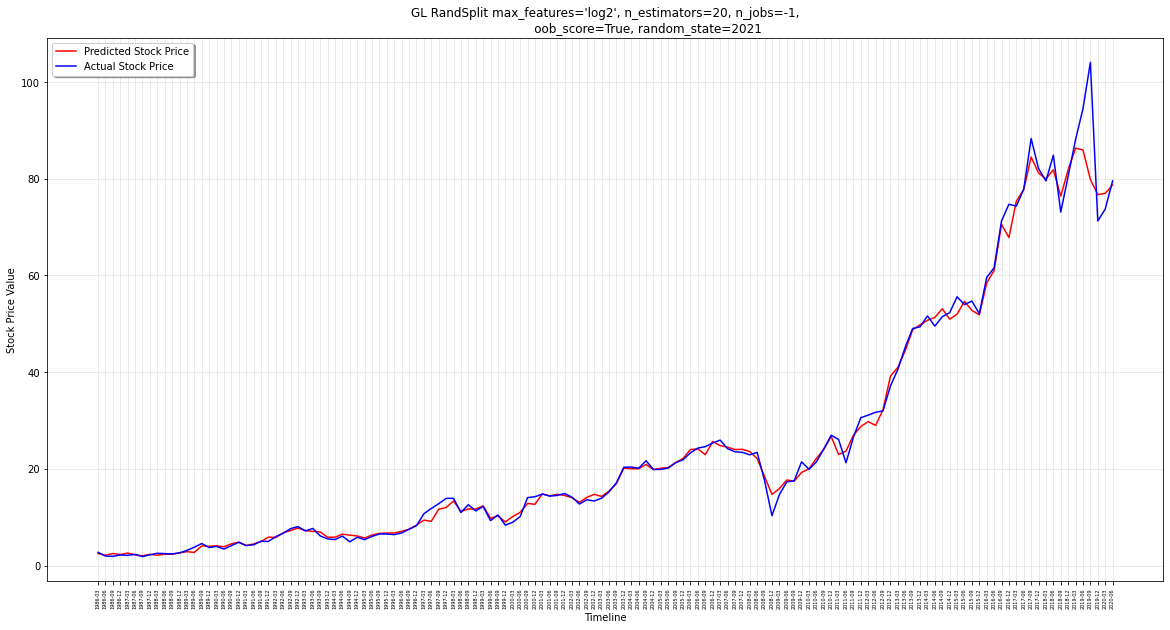

GL MODEL RESULTS
 RMSE
 	Test: 4.91360536884309
 MAPE
 	Test: 0.1054708802250111
 MAE
 	Test: 2.0079623550176615
 R2 Score Adj
 	Test: 0.9481504904550451



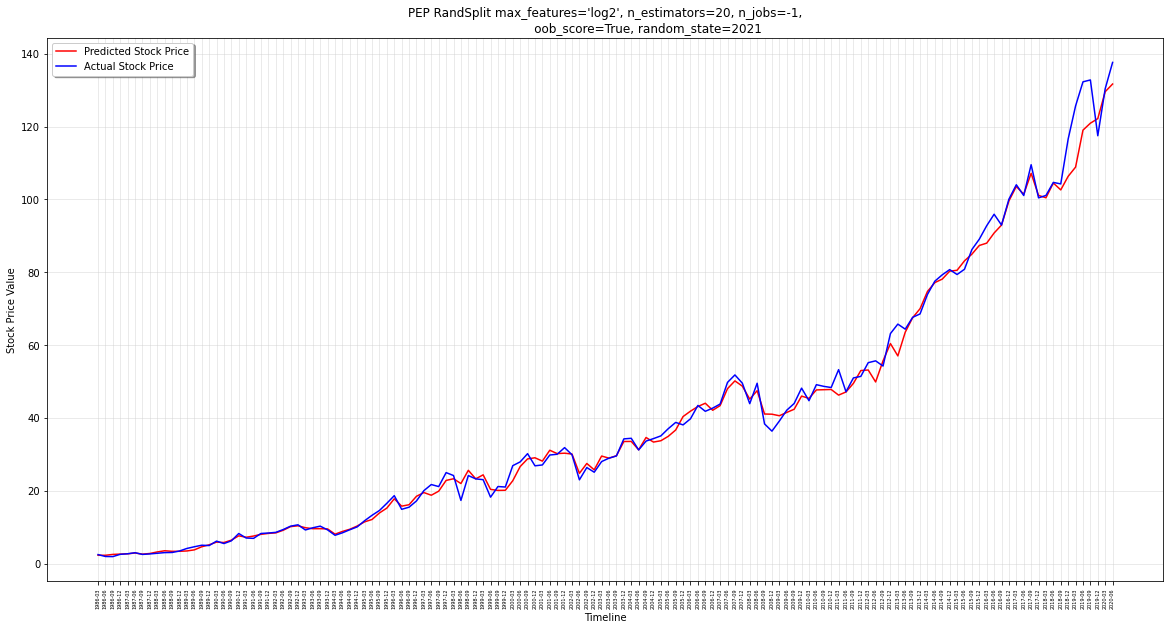

PEP MODEL RESULTS
 RMSE
 	Test: 5.183672247133624
 MAPE
 	Test: 0.08411589278530869
 MAE
 	Test: 3.0595039691243864
 R2 Score Adj
 	Test: 0.96967555979628



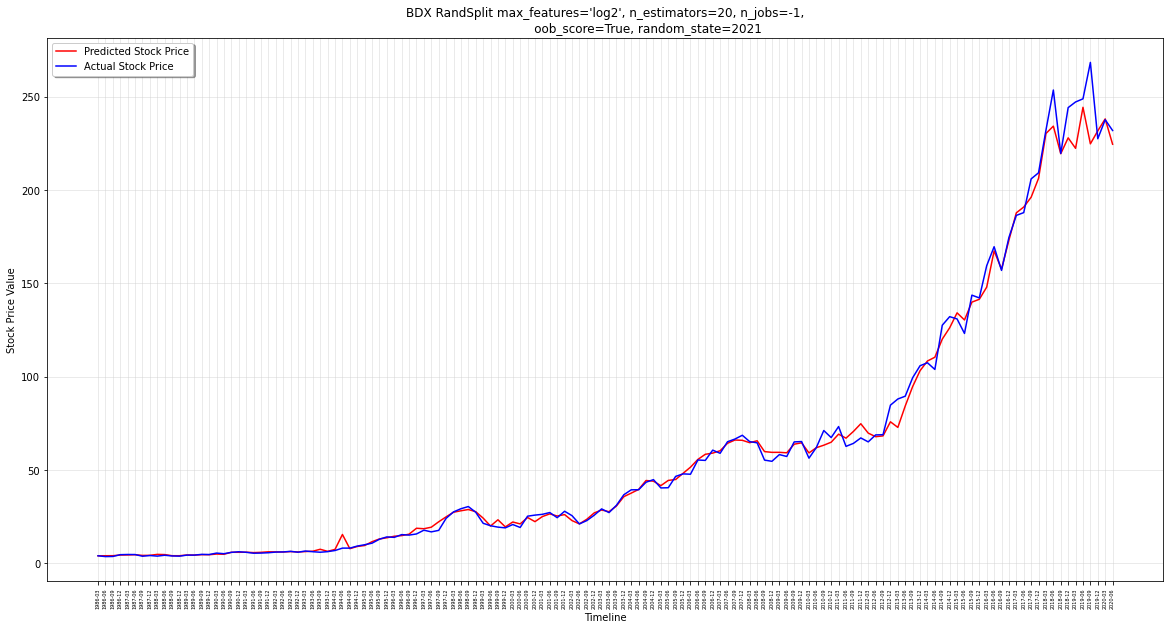

BDX MODEL RESULTS
 RMSE
 	Test: 10.921507818602294
 MAPE
 	Test: 0.09071954153875793
 MAE
 	Test: 5.534296580723352
 R2 Score Adj
 	Test: 0.9666693762055464



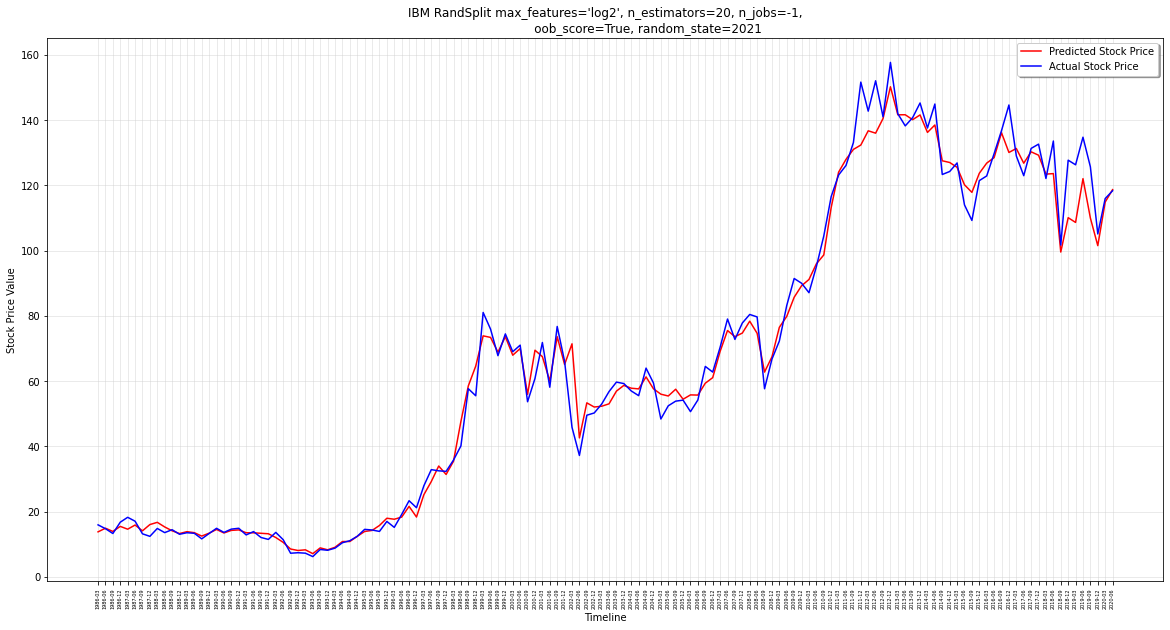

IBM MODEL RESULTS
 RMSE
 	Test: 9.583352514883044
 MAPE
 	Test: 0.10857432670832244
 MAE
 	Test: 6.2139379612037136
 R2 Score Adj
 	Test: 0.9444314916927865



In [10]:
from lib.fundamental_lib import model_results_revised
#Best Params
#Params={'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 20, 'oob_score': True}
Params={'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 20, 'oob_score': True}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_depth=Params['max_depth'], random_state=2021, min_samples_leaf=Params['min_samples_leaf'], max_features=Params['max_features'], n_estimators=Params['n_estimators'], oob_score=Params['oob_score'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    model_results_revised(datas[stock], rf, label=stock, scaling=True, start='1986-03')

## 3.3 Sequential split - No scaled prediction variable

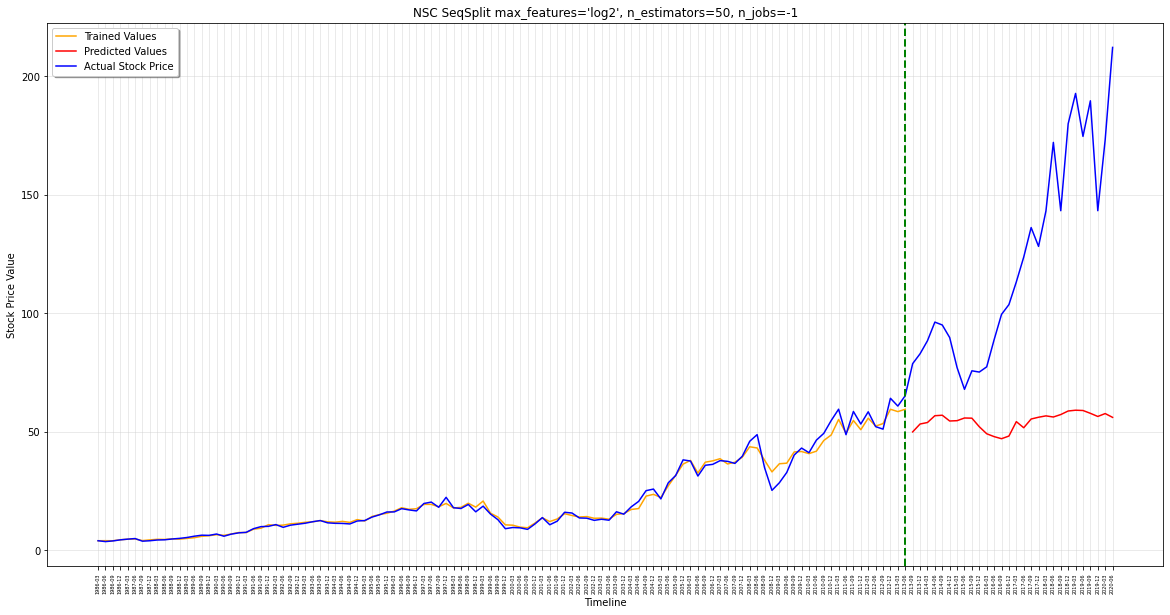

NSC MODEL RESULTS
 RMSE
 	Train: 2.007193923325337
 	Test: 84.38455146698452
 	Dataset: 38.585138440835415
 MAPE
 	Train: 0.05461464379942999
 	Test: 0.5132482573792833
 	Dataset: 0.15030079339522673
 R2 Score Adj
 	Train: 0.9826868588503265
 	Test: -6.626515587596887
 	Dataset: 0.31959017350476215



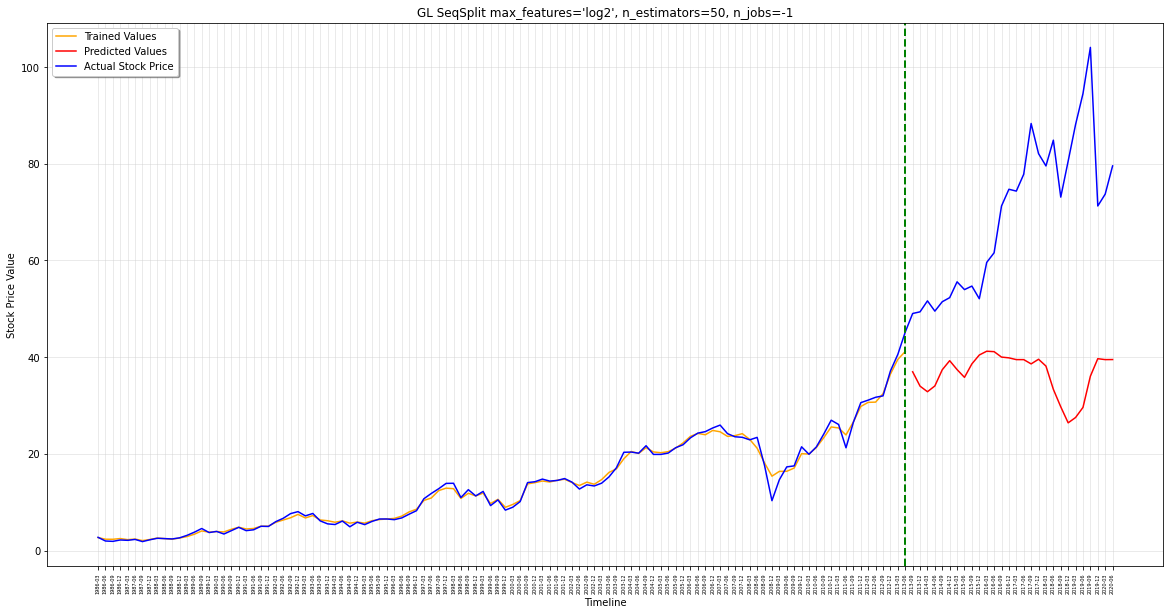

GL MODEL RESULTS
 RMSE
 	Train: 0.8823222992690579
 	Test: 37.43057348997414
 	Dataset: 17.114935484389424
 MAPE
 	Train: 0.047707397314044386
 	Test: 0.44581950650865426
 	Dataset: 0.13076675822515005
 R2 Score Adj
 	Train: 0.9897112349525937
 	Test: -12.132137884463893
 	Dataset: 0.48935980617674635



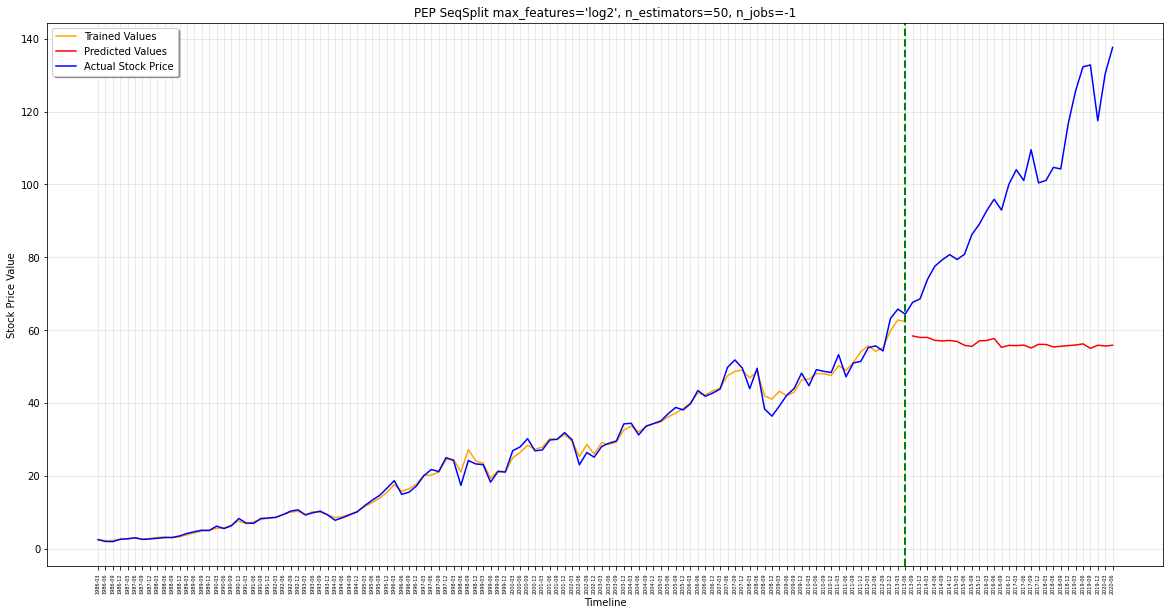

PEP MODEL RESULTS
 RMSE
 	Train: 1.351191860440525
 	Test: 49.887979885998014
 	Dataset: 22.81869968913005
 MAPE
 	Train: 0.03927443943065559
 	Test: 0.41611317591163605
 	Dataset: 0.1178954707828026
 R2 Score Adj
 	Train: 0.9929705892527755
 	Test: -11.669980379491191
 	Dataset: 0.5398636040227225



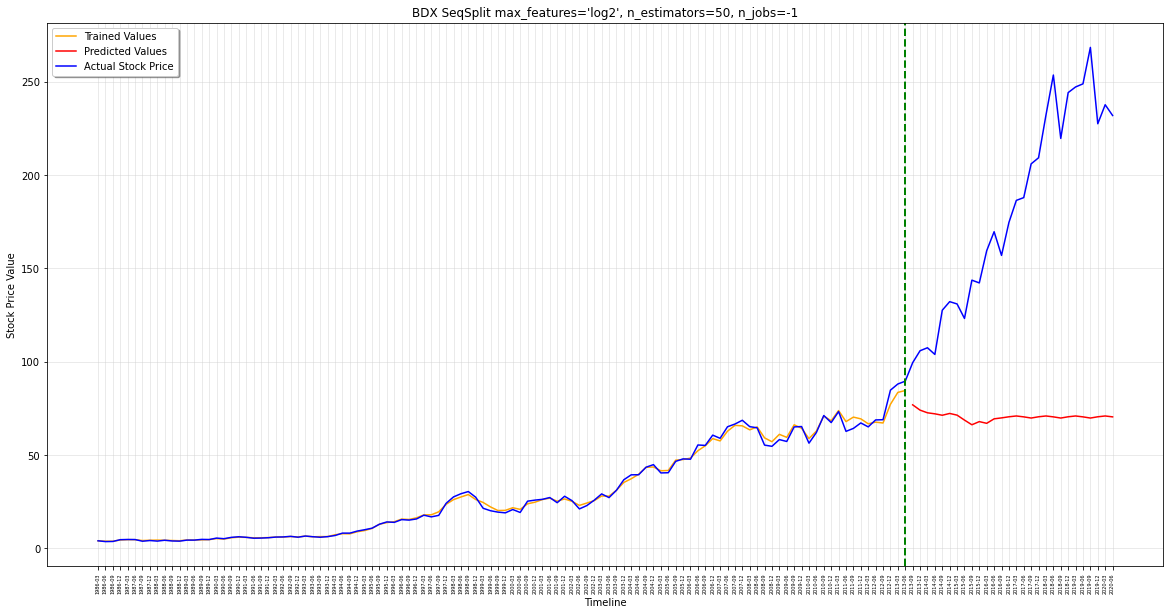

BDX MODEL RESULTS
 RMSE
 	Train: 1.701071248298157
 	Test: 125.19301392156599
 	Dataset: 57.20364555981592
 MAPE
 	Train: 0.036118525964291805
 	Test: 0.5752947315252015
 	Dataset: 0.14860852568563268
 R2 Score Adj
 	Train: 0.9943842452509761
 	Test: -11.875150198055975
 	Dataset: 0.25518358731109747



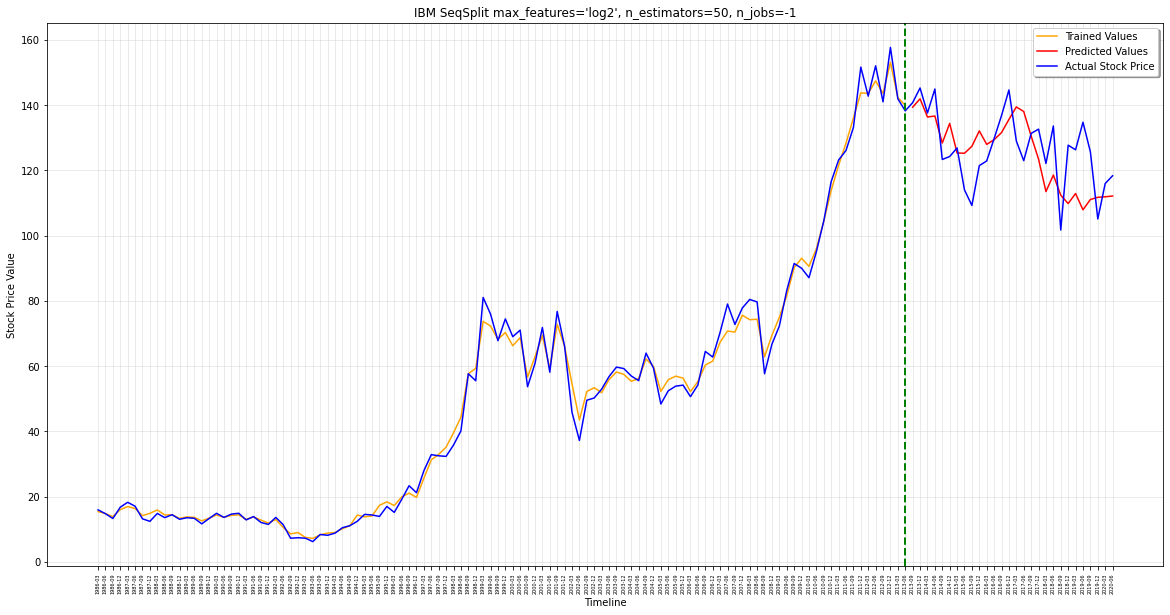

IBM MODEL RESULTS
 RMSE
 	Train: 2.7261316636546185
 	Test: 11.105095385997414
 	Dataset: 5.622327333504359
 MAPE
 	Train: 0.05108253943572278
 	Test: 0.07408299663343082
 	Dataset: 0.055881195973374105
 R2 Score Adj
 	Train: 0.9944138098252696
 	Test: -1.4155528502899544
 	Dataset: 0.9838676298127629



In [15]:
from lib.fundamental_lib import model_results_seq
#Best Params
Params={'max_features': 'log2', 'n_estimators': 50}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_features=Params['max_features'], n_estimators=Params['n_estimators'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'Windowed_{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, rf, label=stock, scaling=False, start='1986-03')

## 3.4 Random split - Scaled prediction variable

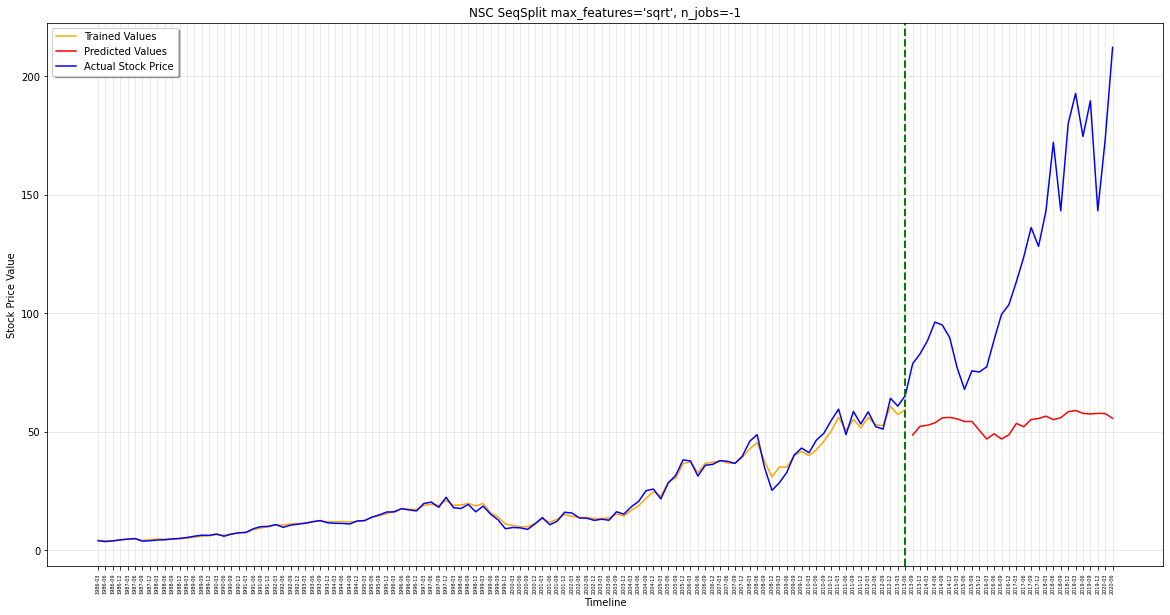

NSC MODEL RESULTS
 RMSE
 	Train: 1.7095448099714807
 	Test: 84.79595080006494
 	Dataset: 38.761558932391495
 MAPE
 	Train: 0.05166933187346288
 	Test: 0.5188862209858918
 	Dataset: 0.14914623679619984
 R2 Score Adj
 	Train: 0.9874409097752209
 	Test: -6.701059839881268
 	Dataset: 0.31335395600290694



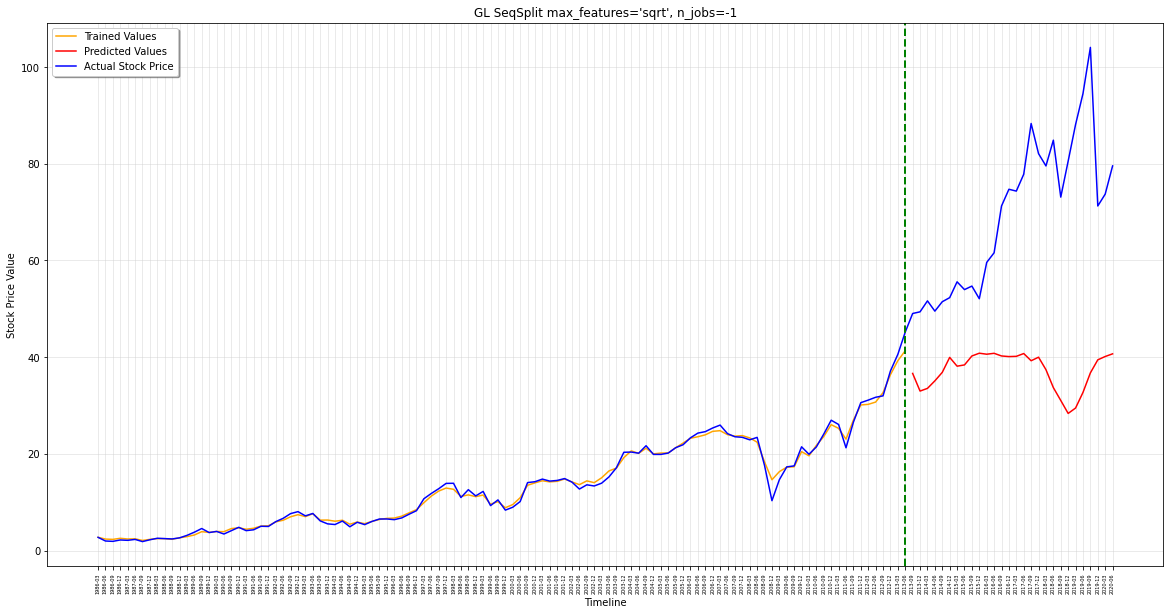

GL MODEL RESULTS
 RMSE
 	Train: 0.8038538057758463
 	Test: 36.65930252125565
 	Dataset: 16.759901890674517
 MAPE
 	Train: 0.049253603532124574
 	Test: 0.43670897500471895
 	Dataset: 0.13008961628539964
 R2 Score Adj
 	Train: 0.9914599014288732
 	Test: -11.596528319379985
 	Dataset: 0.510325591323729



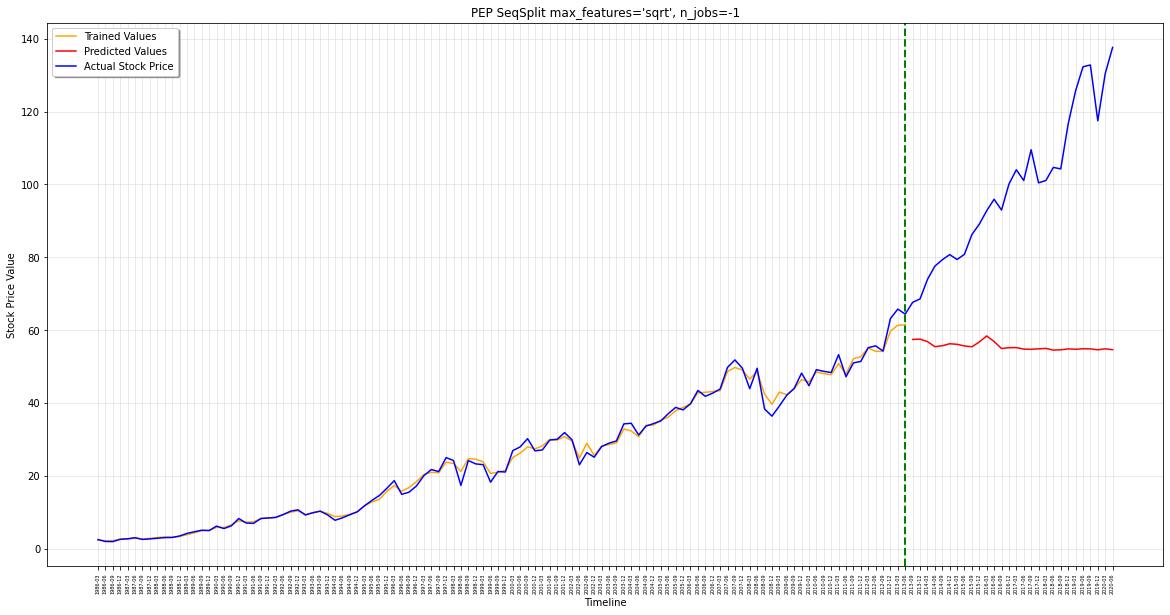

PEP MODEL RESULTS
 RMSE
 	Train: 1.2996116255208923
 	Test: 50.65255780481649
 	Dataset: 23.165118234915557
 MAPE
 	Train: 0.03860800387452409
 	Test: 0.4241348836388531
 	Dataset: 0.11904166943686618
 R2 Score Adj
 	Train: 0.9934970254327928
 	Test: -12.061313909423383
 	Dataset: 0.5257865764218848



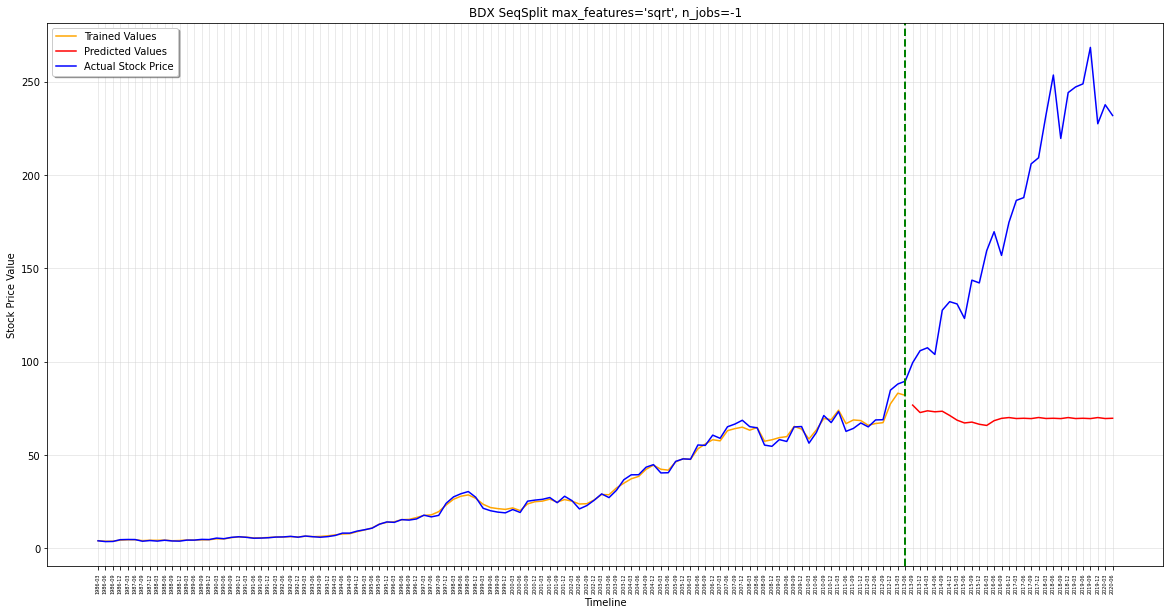

BDX MODEL RESULTS
 RMSE
 	Train: 1.7274539054015747
 	Test: 125.78524450729226
 	Dataset: 57.474683510664825
 MAPE
 	Train: 0.0371483800579808
 	Test: 0.5781450794057783
 	Dataset: 0.1500181950298234
 R2 Score Adj
 	Train: 0.9942087000352574
 	Test: -11.997251149615556
 	Dataset: 0.24810880167048344



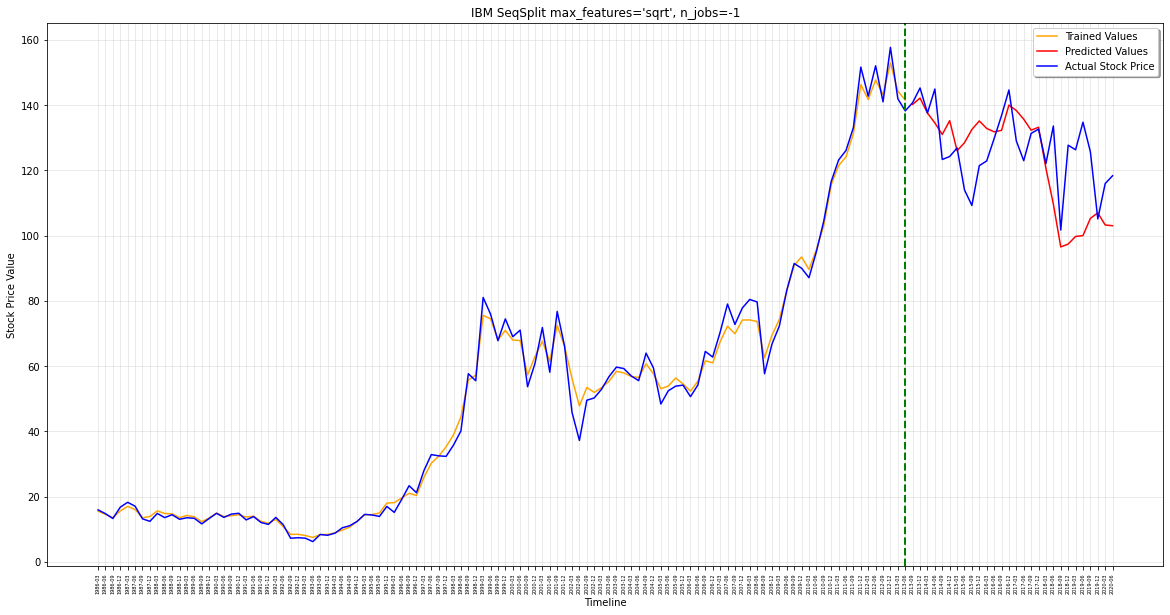

IBM MODEL RESULTS
 RMSE
 	Train: 2.7406018763375415
 	Test: 14.873401645809112
 	Dataset: 7.217845126681435
 MAPE
 	Train: 0.04807964231617708
 	Test: 0.09007726727143842
 	Dataset: 0.05684173673130357
 R2 Score Adj
 	Train: 0.9943543498282804
 	Test: -3.3330387140881728
 	Dataset: 0.9734122832159398



In [17]:
from lib.fundamental_lib import model_results_seq
#Best Params
Params={'max_features': 'sqrt', 'n_estimators': 100}
rf = RandomForestRegressor(bootstrap=True, n_jobs=-1, max_features=Params['max_features'], n_estimators=Params['n_estimators'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'Windowed_{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, rf, label=stock, scaling=True, start='1986-03')